# Assignment Linear Regression




                                                                                                Deployed By Vikas Garg

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

 

Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building.

## Step 1: Reading and Understanding the Data

In [1]:
# Lets import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows',210)
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
from IPython.core.pylabtools import figsize

In [2]:
# Defining Source Path

path = "C:/Users/v2garg/Desktop/Python Imp notebooks/Linear Regression_Module_1,2/Module_2_Assignment/CarPrice_Assignment.csv"

In [3]:
df=pd.read_csv(path,engine='python')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
df['symboling']=df.symboling.astype('object')

In [6]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


data type is correct for all features so no need to changed

In [7]:
# Check for missing values
df.isnull().sum().sum()

0

There is no missing value found in data frame

In [8]:
#Add new derived variable company_name as per given instruction and drop "CarName"
df['company_name']=df.CarName.apply(lambda x:x.split(' ')[0])
df=df.drop('CarName',axis=1)

In [9]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:
df.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
# car_ID is unique for all observation and will not add any value in model. Lets drop this variable
df=df.drop('car_ID',axis=1)

In [12]:
#Check for outliers of variable 'peakrpm'
df.sort_values('peakrpm',ascending=False).head(5)
#6600 rpm is not looking as outlier while checking other corresponding variables eg price,horsepower, highwaympg etc 

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
165,1,gas,std,two,sedan,rwd,front,94.5,168.7,64.0,52.6,2265,dohc,four,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9298.0,toyota
166,1,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,52.6,2300,dohc,four,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9538.0,toyota
33,1,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1940,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529.0,honda
34,1,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1956,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129.0,honda
35,0,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,54.5,2010,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295.0,honda


In [13]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg   

In [15]:
#Creating numeric and categorical columns
nums=df.select_dtypes(include=['int64','float64']).columns
cats=df.select_dtypes(include='object').columns
nums,cats

(Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg', 'price'],
       dtype='object'),
 Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
        'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
        'fuelsystem', 'company_name'],
       dtype='object'))

In [16]:
df.company_name.value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: company_name, dtype: int64

` Some company names are having incorrect spelling. Lets correct those `

In [17]:
df['company_name']=df.company_name.replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})

In [18]:
#Check for any incorrect company name
df.company_name.value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: company_name, dtype: int64

In [19]:
nums

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

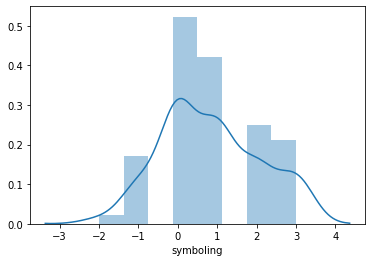

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


In [20]:
#Its assigned insurance risk rating, A value of +3 indicates that the auto is risky.
#-3 that it is probably pretty safe.(Categorical) 
sns.distplot(df.symboling)
plt.show()
print(df.symboling.value_counts())

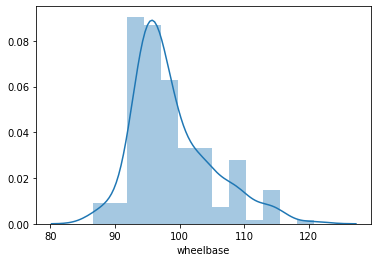

In [21]:
sns.distplot(df.wheelbase)
plt.show()

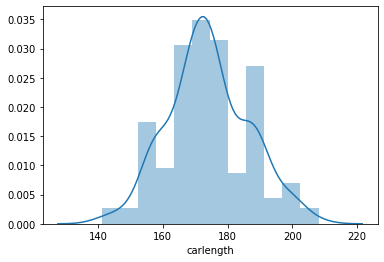

In [22]:
sns.distplot(df.carlength)
plt.show()

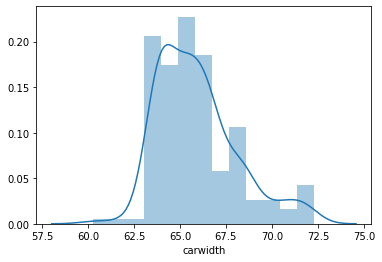

In [23]:
sns.distplot(df.carwidth)
plt.show()

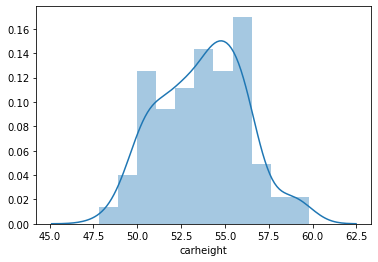

In [24]:
sns.distplot(df.carheight)
plt.show()

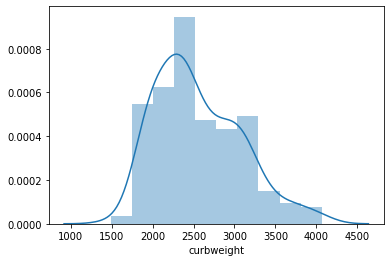

In [25]:
#The weight of a car without occupants or baggage
sns.distplot(df.curbweight)
plt.show()

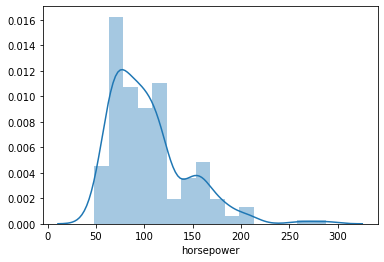

In [26]:
sns.distplot(df.horsepower)
plt.show()

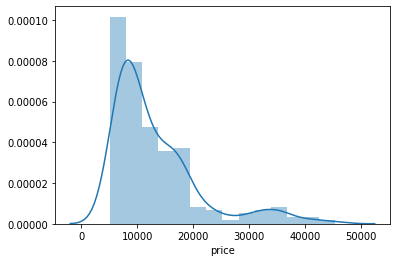

In [27]:
sns.distplot(df.price)
plt.show()

In [28]:
cats

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company_name'],
      dtype='object')

####   Lets check the distribution of all categorical variables 

In [29]:
for i in range(len(cats)):
    print(df[cats[i]].value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peug

## Step 2: Visualising the Data

- If there is some obvious multicollinearity going on, this is the first place to catch it
- We can identify if some predictors directly have a strong association with the target variable.

Let' visualise our data using matplotlib and seaborn

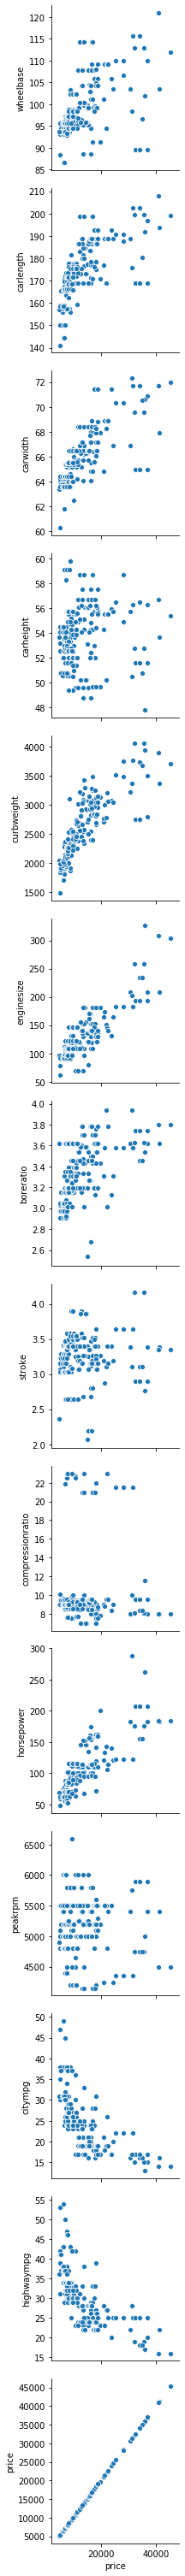

In [30]:
#Pair plot of price with all other numeric variables
sns.pairplot(data=df[nums],x_vars='price',y_vars=nums,height=3.0)
plt.show()

- Pair plot is showing positive association with horspower, enginesize, curbweight, carlength
- Negative correlation with highwaympg, citympg


#### Lets check the correlation

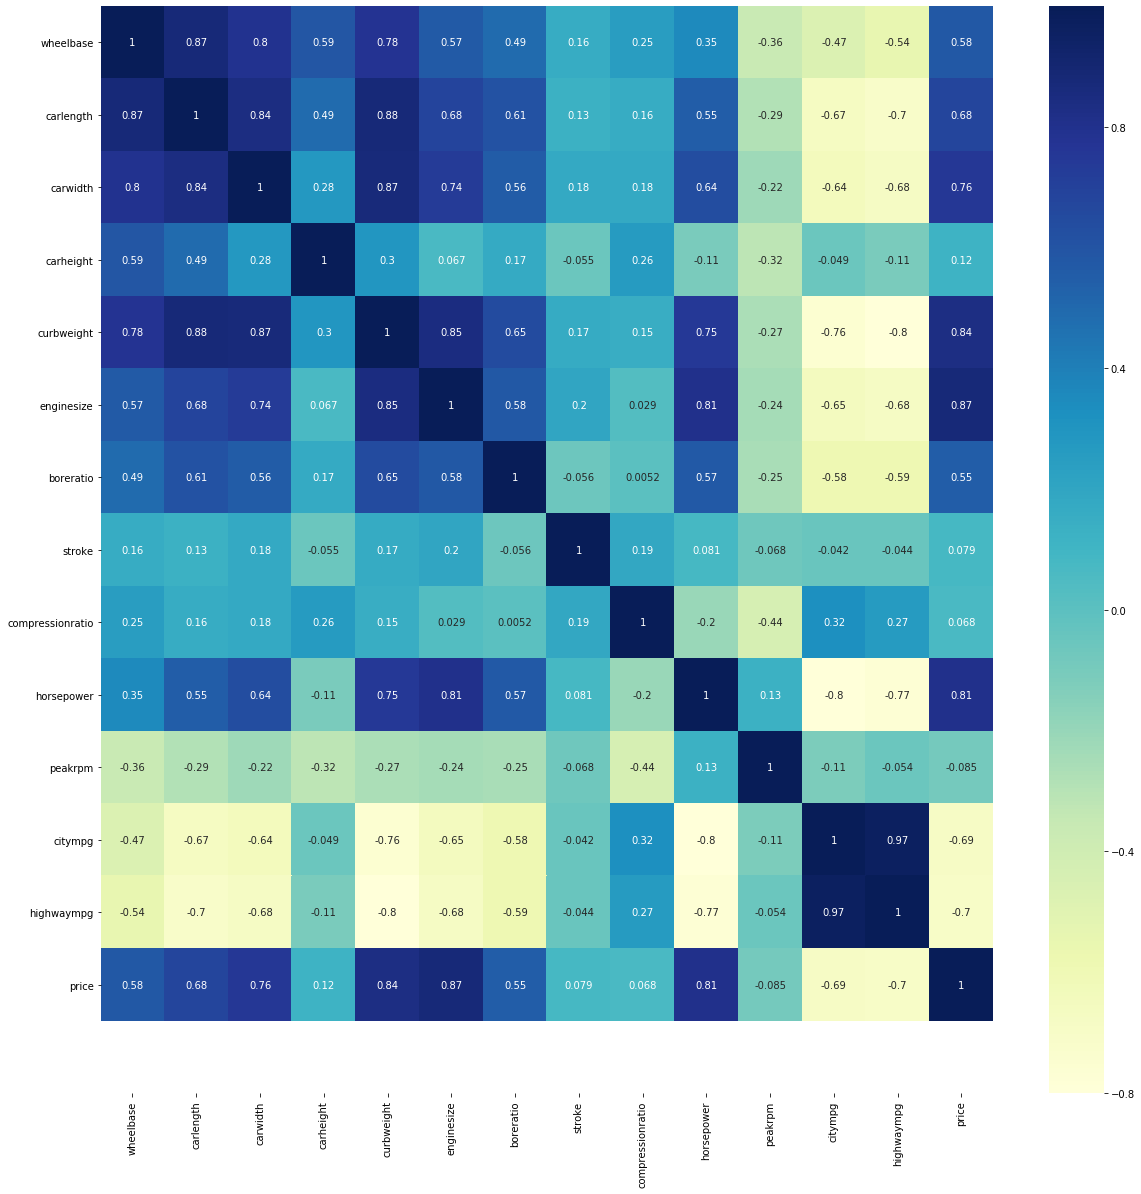

In [31]:
plt.figure(figsize=(20,20))
pl=sns.heatmap(df[nums].corr(),annot = True, cmap="YlGnBu")
pl.set_ylim(15,0)
plt.show()

- As mentioned earlier, price is having strong positive and negative association with some variables
- Multicolinearity is also present there. eg horspower/enginesize/curbweight, curbweight/highwaympg etc which will be treated in VIF analysis while model building.

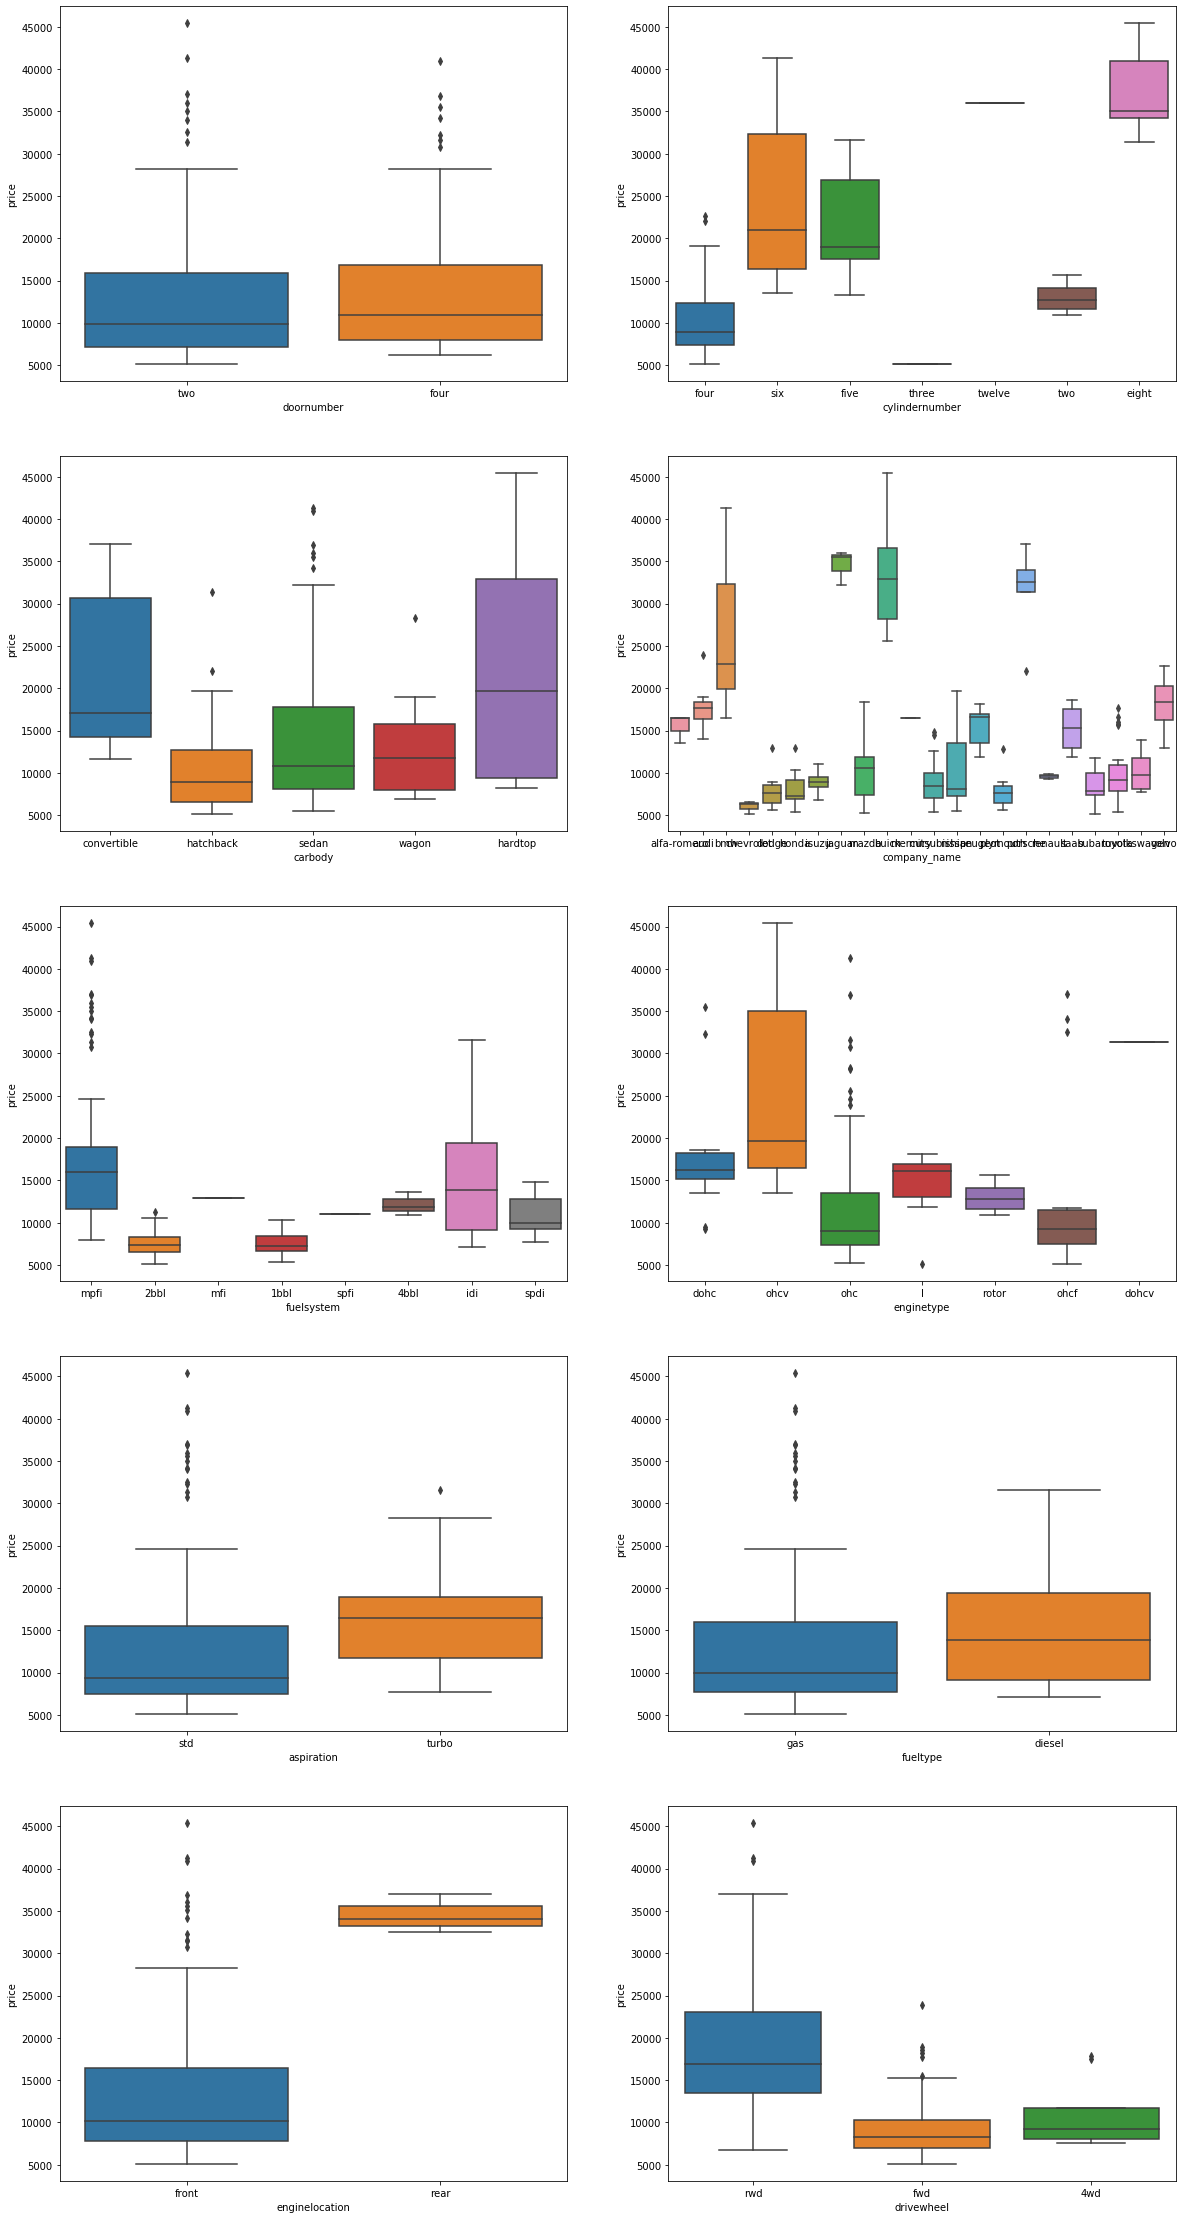

In [32]:
#### Lets check the correlation between price and categorical variables.
plt.figure(figsize=(20, 40))
plt.subplot(5,2,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(5,2,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(5,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(5,2,4)
sns.boxplot(x = 'company_name', y = 'price', data = df)
plt.subplot(5,2,5)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.subplot(5,2,6)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(5,2,7)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(5,2,8)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(5,2,9)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(5,2,10)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.show()

In [33]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

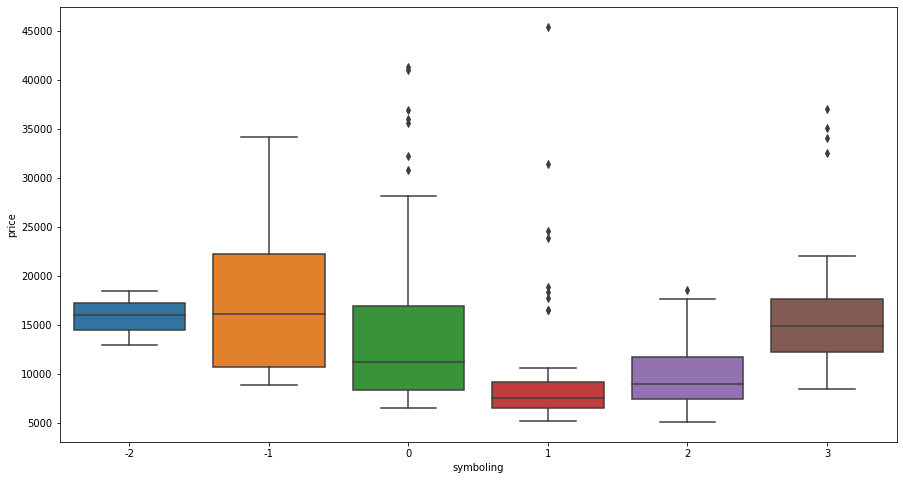

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(x='symboling',y='price',data=df)
plt.show()

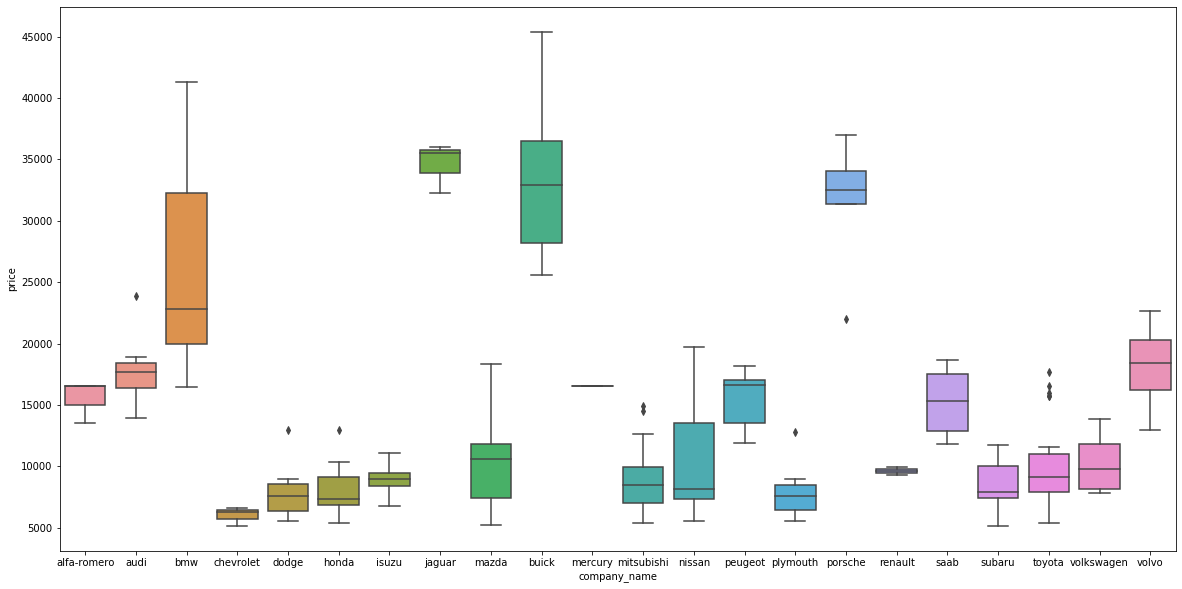

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'company_name', y = 'price', data = df)
plt.show()

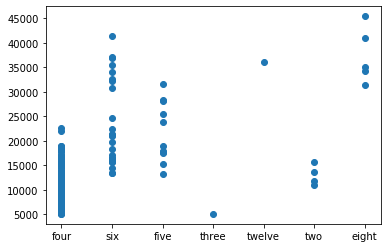

In [36]:
plt.scatter(df.cylindernumber,df.price)

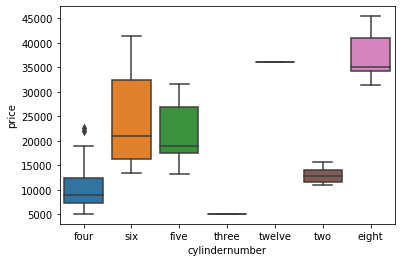

In [37]:
sns.boxplot(x=df.cylindernumber,y=df.price)

#### Main observations are as follows
- Price of cars with both type of doors are almost same.
- Chevrolet is the company with lowest price.
- Companies with highest price are bmw, jaguar,buick and porsche
- Price of car with rear engine is high 
- cars with aspiration of turbo is high as compared to standard
- cars with engine type ohcv are costly as compared to other type of engines.
- Rear wheel driving cars are costly.

## Step 3: Data Preparation
` We can see there are many categoical variables which dummy variables should be created.`

In [38]:
df[cats].nunique()

symboling          6
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
company_name      22
dtype: int64

In [39]:
#Create dummy variables for all categorical features
symboling    =pd.get_dummies(df.symboling,prefix='symboling',drop_first=1)
doornumber    =pd.get_dummies(df.doornumber,prefix='doornumber',drop_first=1)
cylindernumber=pd.get_dummies(df.cylindernumber,prefix='cylindernumber',drop_first=1)
carbody       =pd.get_dummies(df.carbody,prefix='carbody',drop_first=1)
companyname   =pd.get_dummies(df.company_name,prefix='company',drop_first=1)
fuelsystem    =pd.get_dummies(df.fuelsystem,prefix='fuelsystem',drop_first=1)
enginetype    =pd.get_dummies(df.enginetype,prefix='enginetype',drop_first=1)
aspiration    =pd.get_dummies(df.aspiration,prefix='aspiration',drop_first=1)
fueltype      =pd.get_dummies(df.fueltype,prefix='fueltype',drop_first=1)
enginelocation=pd.get_dummies(df.enginelocation,prefix='enginelocation',drop_first=1)
drivewheel    =pd.get_dummies(df.drivewheel,prefix='drivewheel',drop_first=1)

dummy=pd.concat([symboling,doornumber,cylindernumber,carbody,companyname,fuelsystem,enginetype,aspiration,fueltype,enginelocation,drivewheel],axis=1)
df=pd.concat([df,dummy],axis=1)

In [40]:
#Drop categorical variables
df=df.drop(cats,axis=1)

In [41]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,doornumber_two,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,aspiration_turbo,fueltype_gas,enginelocation_rear,drivewheel_fwd,drivewheel_rwd
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [42]:
df.shape

(205, 69)

In [43]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,doornumber_two,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,aspiration_turbo,fueltype_gas,enginelocation_rear,drivewheel_fwd,drivewheel_rwd
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets


In [44]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)

In [45]:
df_train.shape

(153, 69)

#### Rescaling the features

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [47]:
# nums=['price', 'wheelbase', 'carlength', 'carwidth', 'carheight',
#        'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
#        'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [48]:
df_train[nums]=scaler.fit_transform(df_train[nums])
df_test[nums] = scaler.transform(df_test[nums])

In [49]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,doornumber_two,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,aspiration_turbo,fueltype_gas,enginelocation_rear,drivewheel_fwd,drivewheel_rwd
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.409759,0.525862,0.459150,0.486220,0.406996,0.241460,0.497718,0.539942,0.196904,0.226661,0.401361,0.344590,0.376082,0.219380,0.098039,0.339869,0.294118,0.124183,0.130719,0.437908,0.065359,0.745098,0.130719,0.006536,0.006536,0.026144,0.019608,0.333333,0.470588,0.143791,0.039216,0.039216,0.032680,0.019608,0.052288,0.065359,0.019608,0.019608,0.084967,0.0,0.058824,0.091503,0.052288,0.032680,0.026144,0.013072,0.019608,0.071895,0.143791,0.058824,0.039216,0.346405,0.019608,0.098039,0.006536,0.431373,0.039216,0.0,0.006536,0.058824,0.699346,0.084967,0.058824,0.026144,0.176471,0.901961,0.013072,0.607843,0.339869
std,0.202947,0.200082,0.184837,0.208172,0.205790,0.151958,0.204628,0.157197,0.247580,0.166705,0.195496,0.185231,0.187222,0.217172,0.298344,0.475220,0.457141,0.330873,0.338200,0.497759,0.247971,0.437237,0.338200,0.080845,0.080845,0.160087,0.139104,0.472953,0.500773,0.352030,0.194745,0.194745,0.178381,0.139104,0.223337,0.247971,0.139104,0.139104,0.279749,0.0,0.236067,0.289270,0.223337,0.178381,0.160087,0.113956,0.139104,0.259163,0.352030,0.236067,0.194745,0.477387,0.139104,0.298344,0.080845,0.496894,0.194745,0.0,0.080845,0.236067,0.460048,0.279749,0.236067,0.160087,0.382472,0.298344,0.113956,0.489835,0.475220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.409756,0.308333,0.350000,0.248254,0.135849,0.357143,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.073404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.

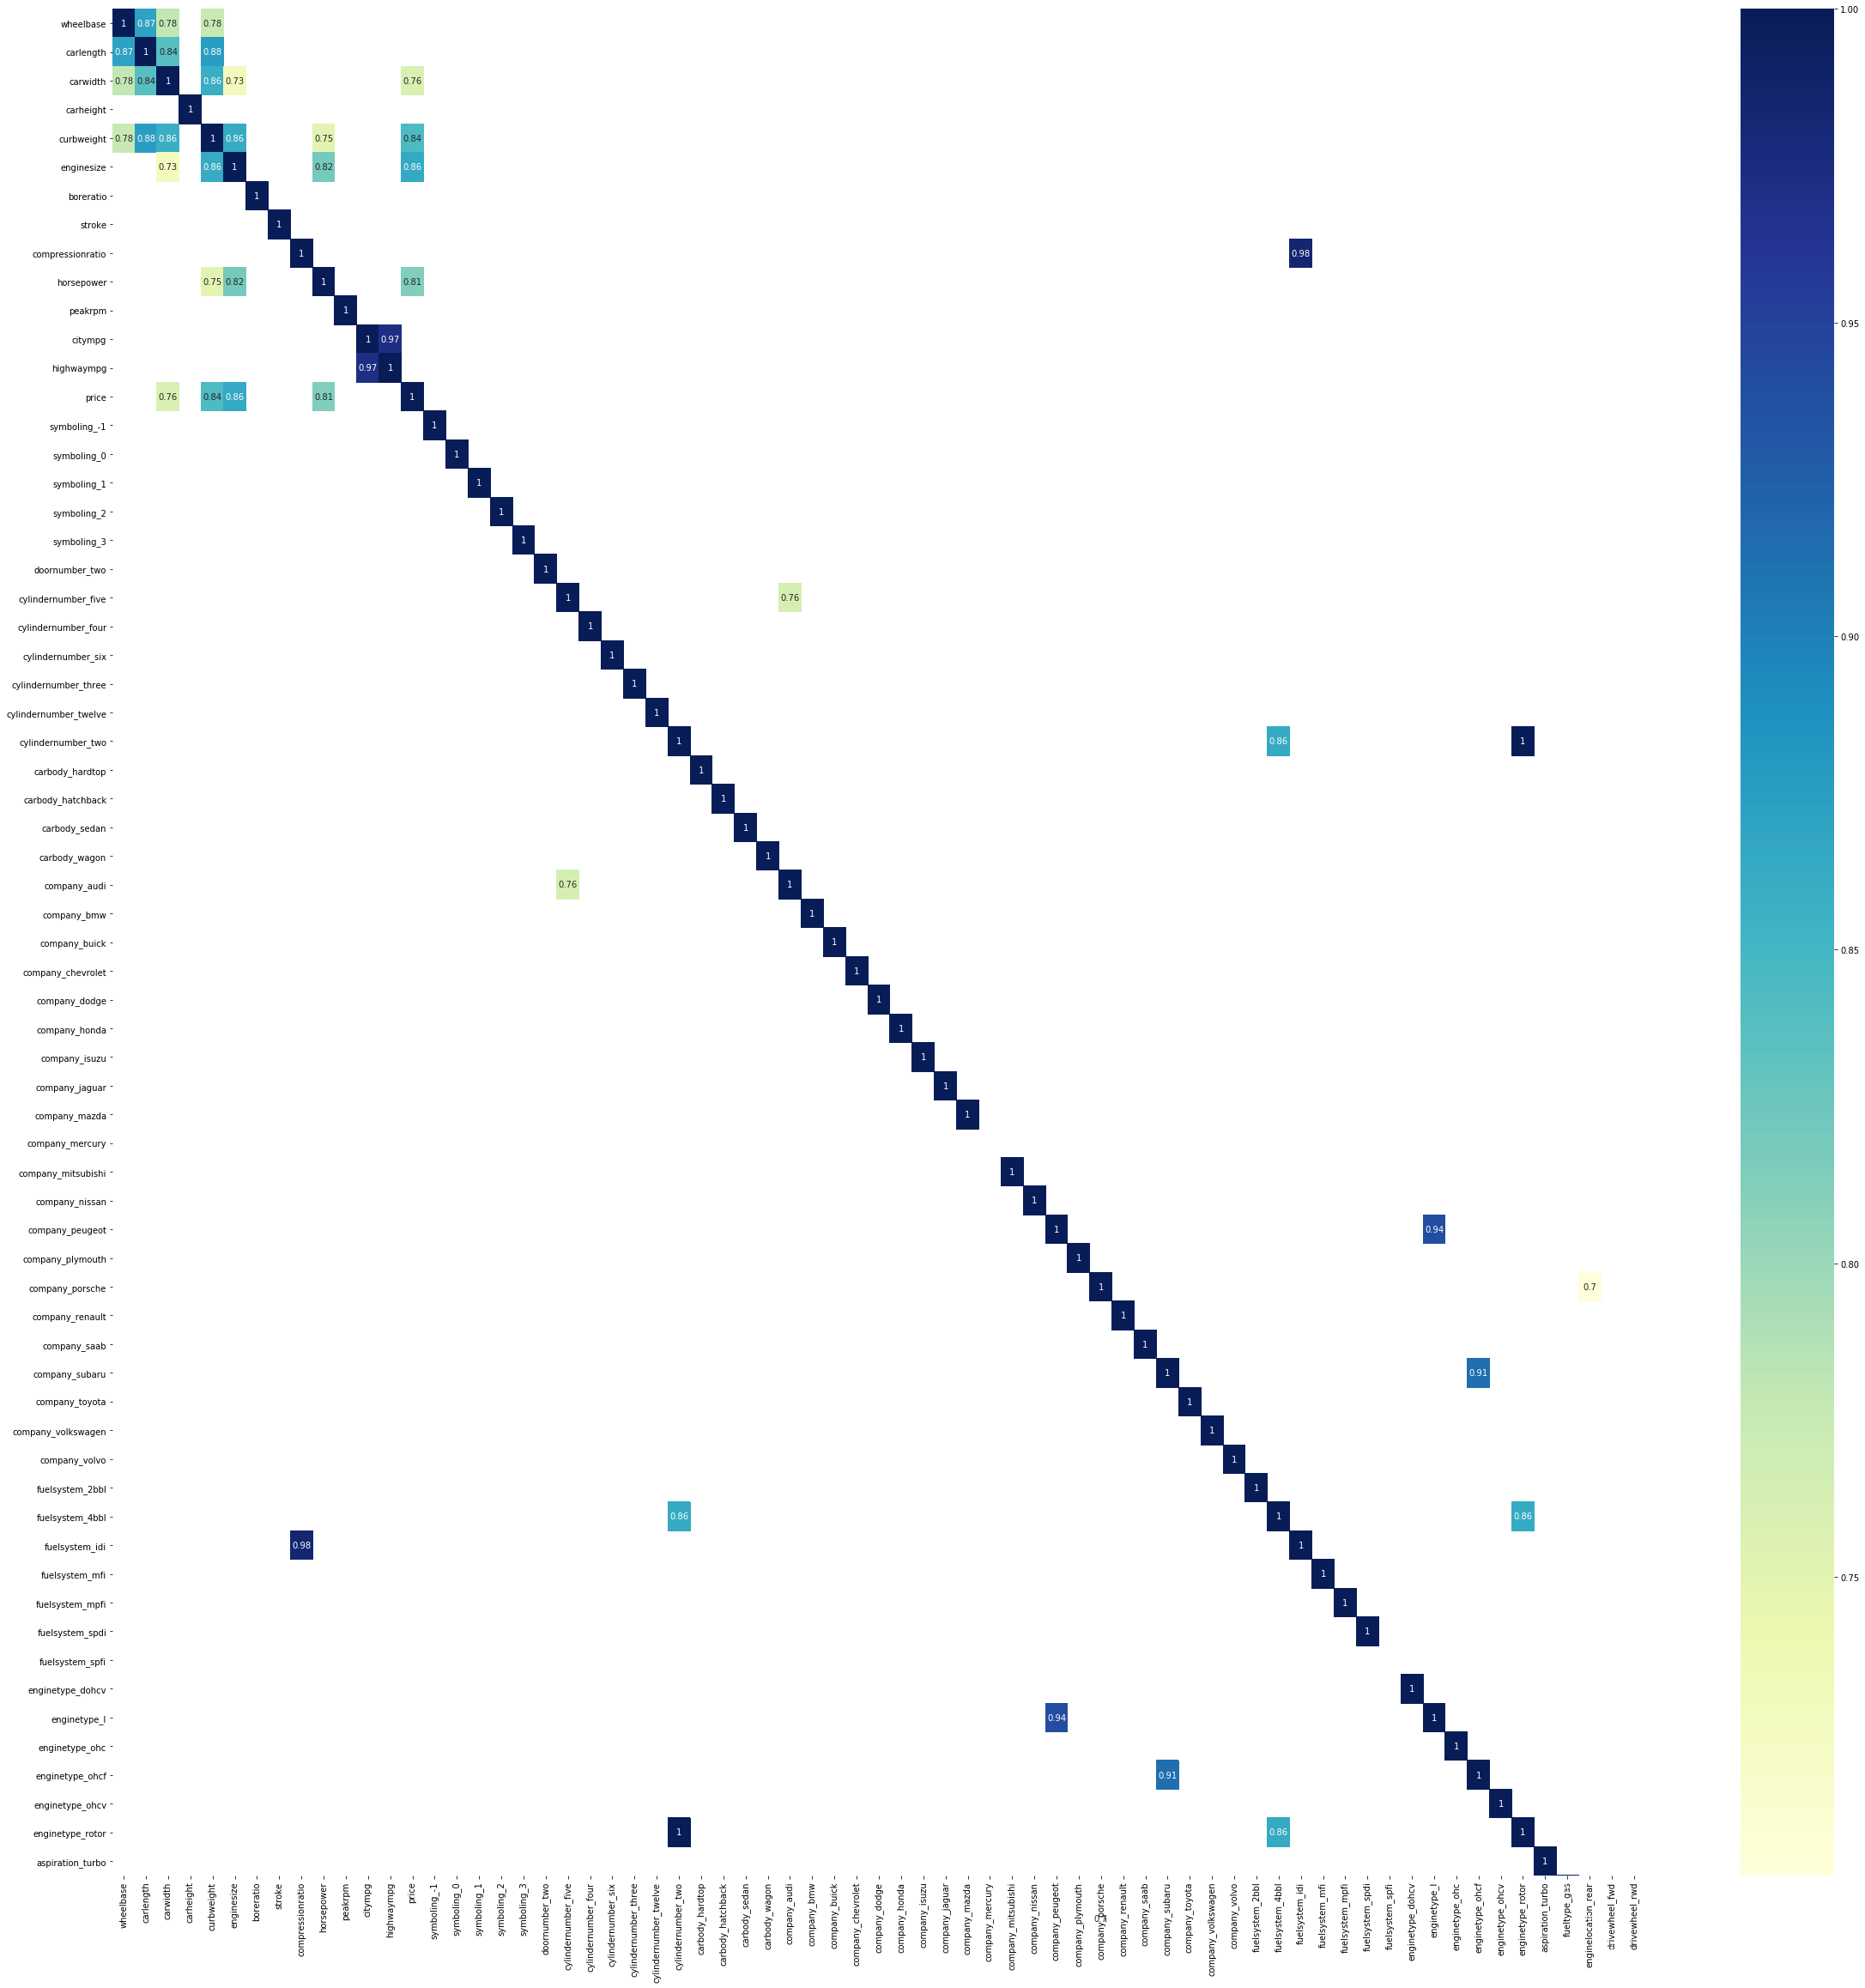

In [50]:
plt.figure(figsize=(40,40))
cor=df_train.corr()
pl=sns.heatmap(cor[(cor>.7)],annot=True,cmap='YlGnBu',)
pl.set_ylim(65,0)
plt.show()

We found some variables which are having good correlation with target variable
- ` enginesize,curbweight,horsepower,carwidth` etc

## Step 5: Building a linear model

# Lets use RFE method for feature selection

In [51]:
df_train.shape,df_test.shape

((153, 69), (52, 69))

In [52]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

In [53]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((153, 68), (153,), (52, 68), (52,))

In [54]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [55]:
lr1=LinearRegression()
lr1.fit(X_train,y_train)

# Use RFE to get best 15 features

rfe1=RFE(lr1,15)
rfe1.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [56]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('wheelbase', False, 16),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 20),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 28),
 ('horsepower', False, 36),
 ('peakrpm', False, 11),
 ('citympg', False, 44),
 ('highwaympg', False, 10),
 ('symboling_-1', False, 6),
 ('symboling_0', False, 5),
 ('symboling_1', False, 4),
 ('symboling_2', False, 3),
 ('symboling_3', False, 2),
 ('doornumber_two', False, 43),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 33),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1),
 ('carbody_hardtop', False, 15),
 ('carbody_hatchback', False, 13),
 ('carbody_sedan', False, 14),
 ('carbody_wagon', False, 12),
 ('company_audi', False, 35),
 ('company_bmw', True, 1),
 ('company_buick', False, 41),
 ('company_chevrolet', False, 26),
 ('company_dodge'

In [57]:
col=X_train.columns[rfe1.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'company_bmw',
       'company_porsche', 'company_volvo', 'enginetype_rotor',
       'enginelocation_rear'],
      dtype='object')

### Model1

In [58]:
X1=X_train[col]
X1_sm=sm.add_constant(X1)
lr1=sm.OLS(y_train,X1_sm).fit()

In [59]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           3.51e-77
Time:                        12:18:25   Log-Likelihood:                 233.02
No. Observations:                 153   AIC:                            -436.0
Df Residuals:                     138   BIC:                            -390.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2351      0.035     -6.649      0.000      -0.305      -0.165
carwidth                  0.2349      0.058      4.084      0.000       0.121       0.349
curbweight                0.2452      0.066      3.688      0.000       0.114       0.377
enginesize                1.5271      0.160      9.548      0.000       1.211       1.843
boreratio                -0.3964      0.054     -7.278      0.000      -0.504      -0.289
stroke                   -0.2799      0.046     -6.136      0.000      -0.370      -0.190
cylindernumber_five       0.2091      0.034      6.222      0.000       0.143       0.276
cylindernumber_four       0.2336      0.039      5.984      0.000       0.156       0.311
cylindernumber_three      0.4271      0.073      5.818      0.000       0.282       0.572
cylindernumber_twelve    -0.5235      0.098     -5.339      0.000      -0.717      -0.330
cylindernumber_two        0.2743      0.034      8.077      0.000       0.207       0.341
company_bmw               0.2876      0.027     10.846      0.000       0.235       0.340
company_porsche           0.2264      0.045      5.048      0.000       0.138       0.315
company_volvo             0.1016      0.026      3.979      0.000       0.051       0.152
enginetype_rotor          0.2743      0.034      8.077      0.000       0.207       0.341
enginelocation_rear       0.3016      0.061      4.924      0.000       0.180       0.423
==============================================================================
Omnibus:                       26.127   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.388
Skew:                           0.763   Prob(JB):                     4.21e-12
Kurtosis:                       5.426   Cond. No.                     9.57e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.3e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,cylindernumber_two,inf
13,enginetype_rotor,inf
2,enginesize,78.57
1,curbweight,45.06
0,carwidth,38.20
3,boreratio,37.50
4,stroke,32.50
6,cylindernumber_four,26.80
5,cylindernumber_five,2.93
8,cylindernumber_twelve,2.76


#### Lets use 10 variabls in RFE and build model

In [61]:
lr2 = LinearRegression()

rfe2=RFE(lr2,10)dd
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [62]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('wheelbase', False, 21),
 ('carlength', False, 24),
 ('carwidth', True, 1),
 ('carheight', False, 25),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 33),
 ('horsepower', False, 41),
 ('peakrpm', False, 16),
 ('citympg', False, 49),
 ('highwaympg', False, 15),
 ('symboling_-1', False, 11),
 ('symboling_0', False, 10),
 ('symboling_1', False, 9),
 ('symboling_2', False, 8),
 ('symboling_3', False, 7),
 ('doornumber_two', False, 48),
 ('cylindernumber_five', False, 5),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 38),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 3),
 ('carbody_hardtop', False, 20),
 ('carbody_hatchback', False, 18),
 ('carbody_sedan', False, 19),
 ('carbody_wagon', False, 17),
 ('company_audi', False, 40),
 ('company_bmw', True, 1),
 ('company_buick', False, 46),
 ('company_chevrolet', False, 31),
 ('company_

In [63]:
col=X_train.columns[rfe2.support_]

#### Model-2

In [64]:
X2=X_train[col]
X2_sm=sm.add_constant(X2)
lr2=sm.OLS(y_train, X2_sm).fit()

In [65]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     154.5
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           4.12e-71
Time:                        12:18:25   Log-Likelihood:                 206.39
No. Observations:                 153   AIC:                            -390.8
Df Residuals:                     142   BIC:                            -357.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1559      0.018     -8.901      0.000      -0.191      -0.121
carwidth                  0.3071      0.060      5.132      0.000       0.189       0.425
curbweight                0.3145      0.077      4.073      0.000       0.162       0.467
enginesize                0.5709      0.094      6.064      0.000       0.385       0.757
boreratio                -0.1107      0.035     -3.129      0.002      -0.181      -0.041
cylindernumber_three      0.1771      0.067      2.644      0.009       0.045       0.309
cylindernumber_twelve    -0.0502      0.080     -0.630      0.530      -0.208       0.107
company_bmw               0.2462      0.029      8.537      0.000       0.189       0.303
company_porsche           0.1641      0.051      3.217      0.002       0.063       0.265
enginetype_rotor          0.1558      0.037      4.249      0.000       0.083       0.228
enginelocation_rear       0.3609      0.070      5.163      0.000       0.223       0.499
==============================================================================
Omnibus:                       12.719   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.344
Skew:                           0.469   Prob(JB):                     0.000104
Kurtosis:                       4.414   Cond. No.                         30.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Check variation inflation factor for these 10 features.
vif = pd.DataFrame()
vif['features']=X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
1,curbweight,42.38
2,enginesize,25.93
0,carwidth,23.10
3,boreratio,9.73
7,company_porsche,2.22
9,enginelocation_rear,2.20
5,cylindernumber_twelve,1.49
8,enginetype_rotor,1.26
6,company_bmw,1.17
4,cylindernumber_three,1.01


### Dropping the variable and updating the model

#### 'cylindernumber_twelve' variable is not statistacally significant and having high p value. Lets drop this and build model.

#### Model3

In [67]:
X3 = X2.drop('cylindernumber_twelve',axis=1)
X3_sm = sm.add_constant(X3)
lr3 = sm.OLS(y_train,X3_sm).fit()

In [68]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     172.4
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           3.70e-72
Time:                        12:18:25   Log-Likelihood:                 206.18
No. Observations:                 153   AIC:                            -392.4
Df Residuals:                     143   BIC:                            -362.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1553      0.017     -8.898      0.000      -0.190      -0.121
carwidth                 0.3084      0.060      5.169      0.000       0.190       0.426
curbweight               0.3274      0.074      4.407      0.000       0.181       0.474
enginesize               0.5392      0.079      6.795      0.000       0.382       0.696
boreratio               -0.1093      0.035     -3.102      0.002      -0.179      -0.040
cylindernumber_three     0.1762      0.067      2.637      0.009       0.044       0.308
company_bmw              0.2496      0.028      8.828      0.000       0.194       0.306
company_porsche          0.1669      0.051      3.291      0.001       0.067       0.267
enginetype_rotor         0.1505      0.036      4.225      0.000       0.080       0.221
enginelocation_rear      0.3653      0.069      5.261      0.000       0.228       0.502
==============================================================================
Omnibus:                       14.026   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.288
Skew:                           0.515   Prob(JB):                     3.93e-05
Kurtosis:                       4.457   Cond. No.                         25.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Checking VIF
vif = pd.DataFrame()
vif['features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values,i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
1,curbweight,39.54
0,carwidth,22.96
2,enginesize,18.47
3,boreratio,9.61
6,company_porsche,2.21
8,enginelocation_rear,2.17
7,enginetype_rotor,1.20
5,company_bmw,1.13
4,cylindernumber_three,1.01


### Dropping the variable and updating the model

 p value in this model is significant for all features. Lets drop 'curbweiht' as its VIF is highest

#### Model-4

In [70]:
X4=X3.drop('carwidth',axis=1)
X4_sm=sm.add_constant(X4)
lr4=sm.OLS(y_train, X4_sm).fit()

In [71]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     161.7
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           5.53e-68
Time:                        12:18:25   Log-Likelihood:                 193.07
No. Observations:                 153   AIC:                            -368.1
Df Residuals:                     144   BIC:                            -340.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1083      0.016     -6.696      0.000      -0.140      -0.076
curbweight               0.5582      0.064      8.659      0.000       0.431       0.686
enginesize               0.5475      0.086      6.357      0.000       0.377       0.718
boreratio               -0.1110      0.038     -2.903      0.004      -0.187      -0.035
cylindernumber_three     0.1295      0.072      1.802      0.074      -0.013       0.271
company_bmw              0.2318      0.030      7.608      0.000       0.172       0.292
company_porsche          0.2332      0.053      4.378      0.000       0.128       0.338
enginetype_rotor         0.1602      0.039      4.148      0.000       0.084       0.237
enginelocation_rear      0.2545      0.072      3.550      0.001       0.113       0.396
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               15.836
Skew:                           0.225   Prob(JB):                     0.000364
Kurtosis:                       4.510   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Checking VIF
vif = pd.DataFrame()
vif['features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values,i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
0,curbweight,25.95
1,enginesize,18.47
2,boreratio,8.44
5,company_porsche,2.18
7,enginelocation_rear,2.05
6,enginetype_rotor,1.20
4,company_bmw,1.11
3,cylindernumber_three,1.01


p value of cylindernumber_three variable not significant, lets drop this variable.

### Dropping the variable and updating the model

#### Model-5

In [73]:
X5=X4.drop('cylindernumber_three',axis=1)
X5_sm=sm.add_constant(X5)
lr5=sm.OLS(y_train, X5_sm).fit()

In [74]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     181.5
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           1.95e-68
Time:                        12:18:25   Log-Likelihood:                 191.37
No. Observations:                 153   AIC:                            -366.7
Df Residuals:                     145   BIC:                            -342.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1034      0.016     -6.436      0.000      -0.135      -0.072
curbweight              0.5503      0.065      8.491      0.000       0.422       0.678
enginesize              0.5491      0.087      6.327      0.000       0.378       0.721
boreratio              -0.1135      0.039     -2.947      0.004      -0.190      -0.037
company_bmw             0.2323      0.031      7.566      0.000       0.172       0.293
company_porsche         0.2349      0.054      4.378      0.000       0.129       0.341
enginetype_rotor        0.1594      0.039      4.094      0.000       0.082       0.236
enginelocation_rear     0.2532      0.072      3.504      0.001       0.110       0.396
==============================================================================
Omnibus:                        9.358   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               15.036
Skew:                           0.283   Prob(JB):                     0.000543
Kurtosis:                       4.428   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Checking VIF
vif = pd.DataFrame()
vif['features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values,i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
0,curbweight,25.89
1,enginesize,18.47
2,boreratio,8.39
4,company_porsche,2.18
6,enginelocation_rear,2.05
5,enginetype_rotor,1.20
3,company_bmw,1.11


Drop curbwight variable due to higher mutlicolinearity/VIF value.

### Dropping the variable and updating the model

#### Model-6

In [76]:
X6=X5.drop('curbweight',axis=1)
X6_sm=sm.add_constant(X6)
lr6=sm.OLS(y_train, X6_sm).fit()

In [77]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.4
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           7.13e-57
Time:                        12:18:26   Log-Likelihood:                 160.49
No. Observations:                 153   AIC:                            -307.0
Df Residuals:                     146   BIC:                            -285.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0852      0.019     -4.386      0.000      -0.124      -0.047
enginesize              1.1583      0.060     19.449      0.000       1.041       1.276
boreratio               0.0073      0.044      0.166      0.868      -0.079       0.094
company_bmw             0.2069      0.037      5.553      0.000       0.133       0.281
company_porsche         0.1674      0.065      2.586      0.011       0.039       0.295
enginetype_rotor        0.2494      0.046      5.462      0.000       0.159       0.340
enginelocation_rear     0.1705      0.087      1.953      0.053      -0.002       0.343
==============================================================================
Omnibus:                       19.692   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.860
Skew:                           0.719   Prob(JB):                     8.92e-07
Kurtosis:                       4.518   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Checking VIF
vif = pd.DataFrame()
vif['features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values,i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
0,enginesize,5.74
1,boreratio,5.73
3,company_porsche,2.11
5,enginelocation_rear,2.02
2,company_bmw,1.10
4,enginetype_rotor,1.10


Lets drop boreratio due to high p value

### Dropping the variable and updating the model

#### Model-7

In [79]:
X7=X6.drop('boreratio',axis=1)
X7_sm=sm.add_constant(X7)
lr7=sm.OLS(y_train, X7_sm).fit()

In [80]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     162.3
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           5.38e-58
Time:                        12:18:26   Log-Likelihood:                 160.48
No. Observations:                 153   AIC:                            -309.0
Df Residuals:                     147   BIC:                            -290.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0829      0.014     -5.993      0.000      -0.110      -0.056
enginesize              1.1635      0.050     23.149      0.000       1.064       1.263
company_bmw             0.2069      0.037      5.571      0.000       0.134       0.280
company_porsche         0.1701      0.062      2.723      0.007       0.047       0.293
enginetype_rotor        0.2507      0.045      5.585      0.000       0.162       0.339
enginelocation_rear     0.1690      0.087      1.953      0.053      -0.002       0.340
==============================================================================
Omnibus:                       19.821   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.206
Skew:                           0.720   Prob(JB):                     7.50e-07
Kurtosis:                       4.533   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Dropping the variable and updating the model

Drop enginelocation_rear due to high p value

#### Model-8

In [81]:
X8=X7.drop('enginelocation_rear',axis=1)
X8_sm=sm.add_constant(X8)
lr8=sm.OLS(y_train, X8_sm).fit()

In [82]:
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     198.2
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           2.34e-58
Time:                        12:18:26   Log-Likelihood:                 158.52
No. Observations:                 153   AIC:                            -307.0
Df Residuals:                     148   BIC:                            -291.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0837      0.014     -6.001      0.000      -0.111      -0.056
enginesize           1.1672      0.051     23.020      0.000       1.067       1.267
company_bmw          0.2063      0.037      5.502      0.000       0.132       0.280
company_porsche      0.2537      0.046      5.531      0.000       0.163       0.344
enginetype_rotor     0.2514      0.045      5.549      0.000       0.162       0.341
==============================================================================
Omnibus:                       17.800   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.674
Skew:                           0.686   Prob(JB):                     7.23e-06
Kurtosis:                       4.353   Cond. No.                         8.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Checking VIF
vif = pd.DataFrame()
vif['features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values,i) for i in range(X8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
0,enginesize,1.18
1,company_bmw,1.10
2,company_porsche,1.08
3,enginetype_rotor,1.00


This is our final model which is having all variables as significant for model and no multicollinearity.
R squared value and adjusted R squared are almost 84% and model is very simple.

## Step 6: Making Predictions Using the Final Model

In [84]:
y_train_pred=lr8.predict(X8_sm)

In [85]:
r2_score(y_train,y_train_pred)

0.8426557119167454

In [89]:
y_test_pred=lr8.predict(sm.add_constant(X_test[X8.columns]))

In [91]:
r2_score(y_train,y_train_pred)

0.8426557119167454

In [92]:
r2_score(y_test,y_test_pred)

0.8470412703940504

## Step 7: Residual Analysis and Model evaluation

In [93]:

residual = y_train- y_train_pred

In [100]:
residual.head(10)

164    0.006973
188    0.007063
7      0.134708
158   -0.055274
123   -0.079867
28    -0.079867
29    -0.117926
182   -0.001413
40     0.010947
128    0.125817
dtype: float64

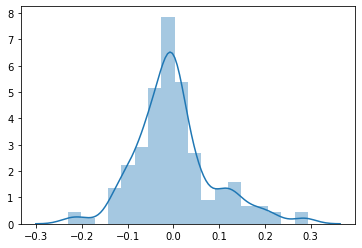

In [94]:
sns.distplot(residual)

Error term is normally distributed

Text(0.5, 1.0, 'prediction on test')

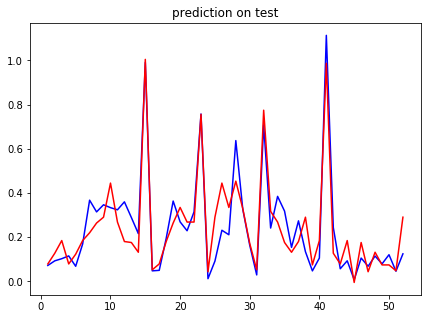

In [105]:
plt.figure(figsize=(7,5))
c = [i for i in range(1,y_test.shape[0]+1,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_test_pred,color = 'red')
plt.title('prediction on test')

Text(0.5, 1.0, 'prediction on train')

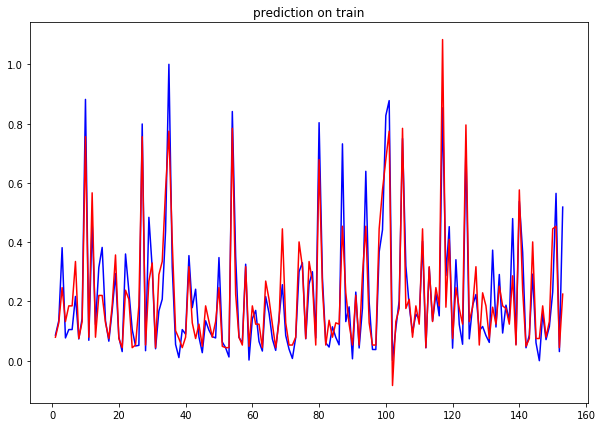

In [104]:
plt.figure(figsize=(10,7))
c = [i for i in range(1,y_train.shape[0]+1,1)]
plt.plot(c, y_train,color = 'Blue')
plt.plot(c, y_train_pred,color = 'red')
plt.title('prediction on train')

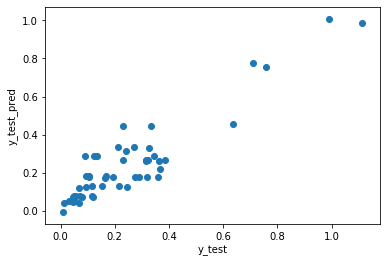

In [96]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

Variance also looks fine for residuals.

### Final Result

In [107]:
#R squared on test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred=y_test_pred)

0.8470412703940504

In [109]:
# Significant variables in predicting the price of car as belo
lr8.params

const              -0.083746
enginesize          1.167201
company_bmw         0.206261
company_porsche     0.253690
enginetype_rotor    0.251399
dtype: float64

#### Linear equation of final model is below


price = -0.083746 + 1.167201 * enginesize + 0.206261 * company_bmw + 0.253690 * company_porsche + 0.251399 * enginetype_rotor

                                                   Thanks 